## Data exploration and preprocessing 

### Data example

In [1]:
from project.src.read_data import read_data

# Load the data

data = read_data('C:\\Users\\chudz\\Desktop\\StudiesF\\MiSD\\Projekt\\data\\Warszawa.json')

print(data.head())

  Price per m    Floor Furnished     Market     Price    Building type   Area  \
0    18851.13  floor_0        no  secondary  699000.0        kamienica  37.08   
1     22812.5  floor_3        no  secondary  730000.0  apartamentowiec     32   
2    15038.54  floor_1        no    primary  839000.0             blok  55.79   
3       20250  floor_3       yes  secondary  405000.0        kamienica     20   
4    24790.24  floor_1       yes  secondary  650000.0  apartamentowiec  26.22   

   Rooms  
0    two  
1    one  
2  three  
3    one  
4    one  


### Processing the data


The data preprocessing phase involves several transformations to tidy up and standardize the data before further analysis. These transformations are crucial for ensuring data consistency and optimizing computational efficiency across the dataset. Specifically, the preprocessing steps include:

    Floor Level Conversion
    
    Boolean Value Transformation
    
    Market Type Conversion
    
    Room Count Conversion
    
    Building Type Mapping
    
    


In [2]:
from src.process_data import preprocess_data

processed = preprocess_data(data)

print(processed.head())

  Price per m Floor Furnished Market     Price Building type   Area Rooms
0    18851.13     0         0      2  699000.0             2  37.08     2
1     22812.5     3         0      2  730000.0             3     32     1
2    15038.54     1         0      1  839000.0             1  55.79     3
3       20250     3         1      2  405000.0             2     20     1
4    24790.24     1         1      2  650000.0             3  26.22     1


### Look at the data

We would like to see corellation beetwen:
    - Floor and price
    - Area and price
    - Room number and price
    - Room number and area
    - If_furnished and price
    - Building type and price
    - Market and price
    

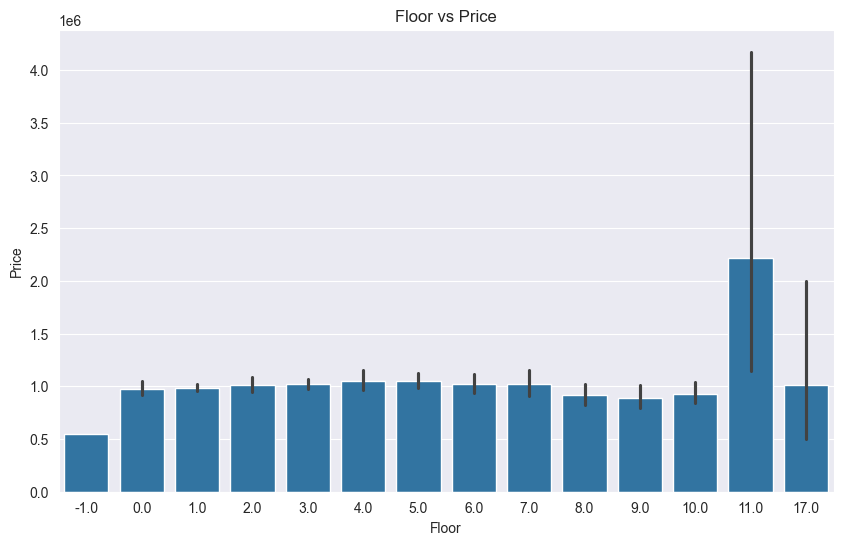

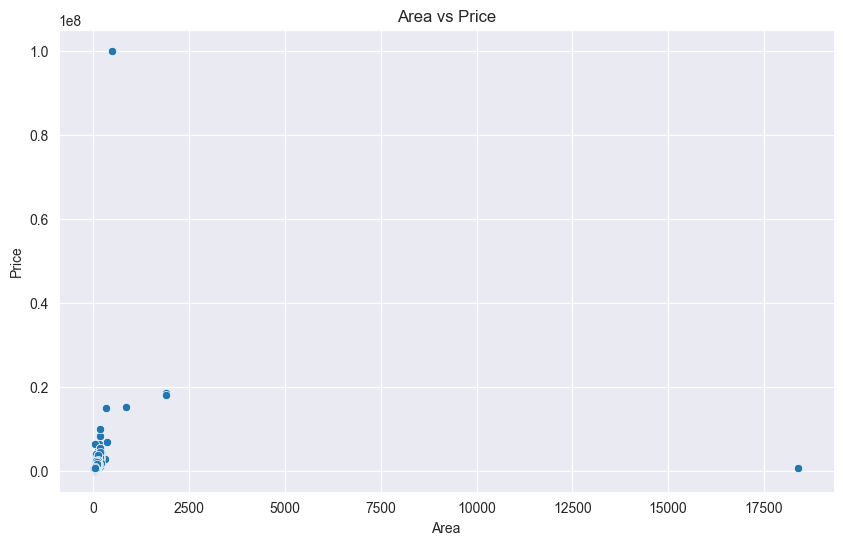

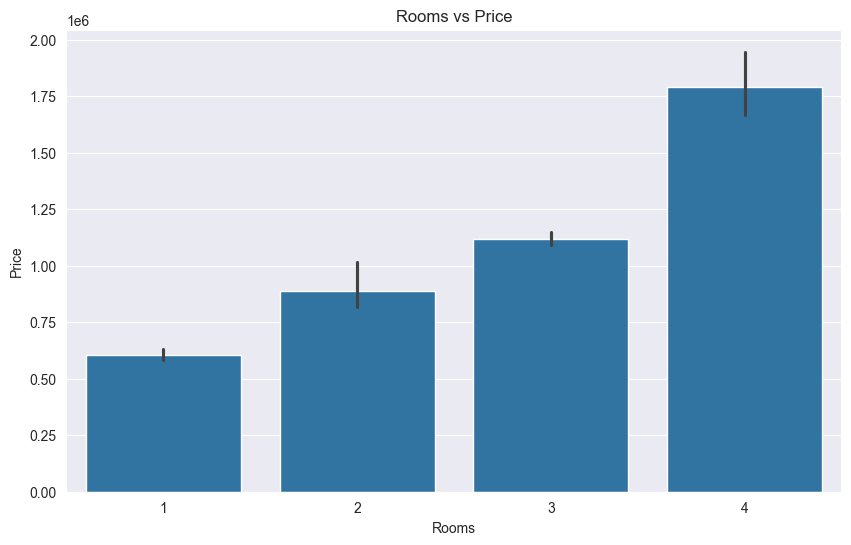

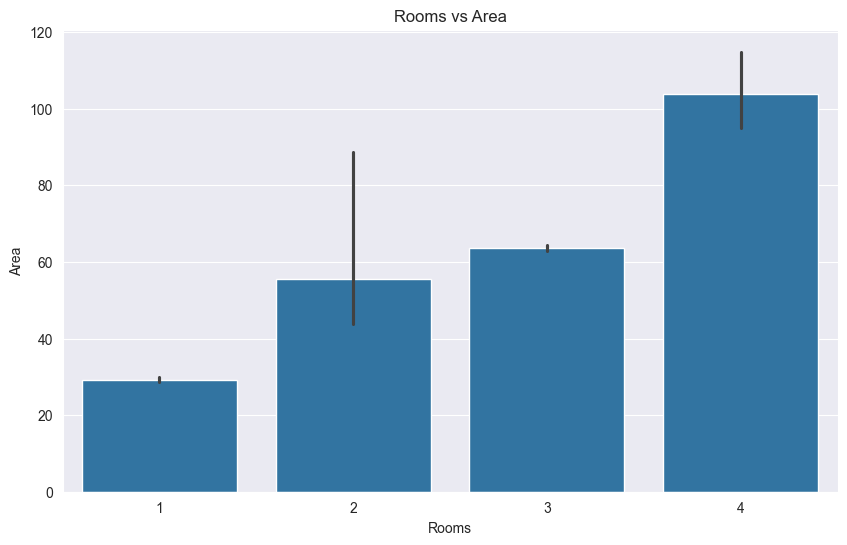

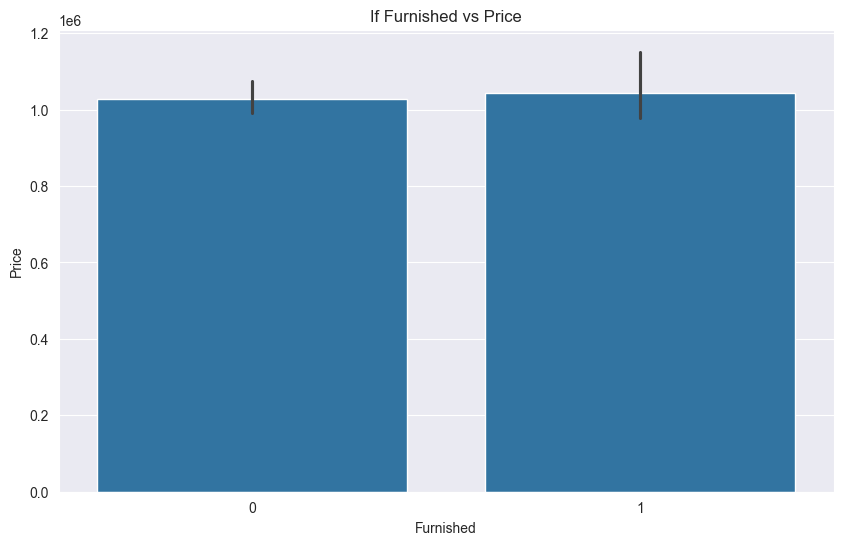

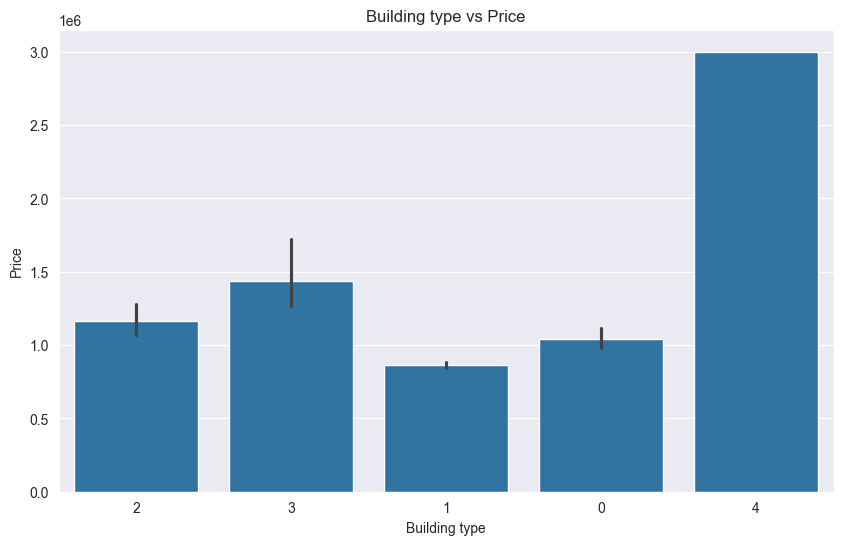

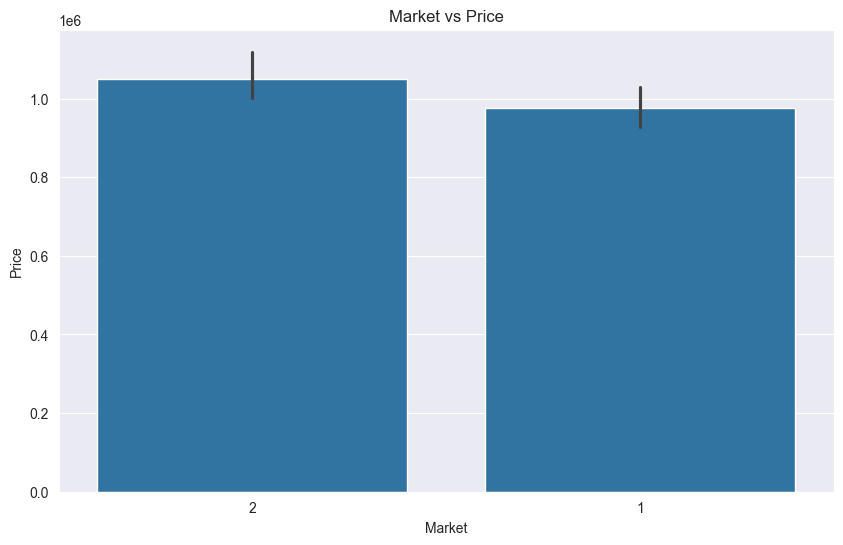

In [3]:
# Plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = processed
# Data conv
df['Floor'] = pd.to_numeric(df['Floor'])
df['Price'] = pd.to_numeric(df['Price'])
df["Area"] = pd.to_numeric(df["Area"])
df["Rooms"] = pd.to_numeric(df["Rooms"])


# Plotting floor and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Floor", y="Price",data=data)
plt.title("Floor vs Price")
plt.show()

# Plotting area and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Area", y="Price", data=data)
plt.title("Area vs Price")
plt.show()

# Plotting room number and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Rooms", y="Price",data=data)
plt.title("Rooms vs Price")
plt.show()

# Plotting room number and area
plt.figure(figsize=(10, 6))
sns.barplot(x="Rooms", y="Area",data=data)
plt.title("Rooms vs Area")
plt.show()

# Plotting if_furnished and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Furnished", y="Price",data=data)
plt.title("If Furnished vs Price")
plt.show()

# Plotting building type and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Building type", y="Price", data=data)
plt.title("Building type vs Price")
plt.show()

# Plotting market and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Market", y="Price", data=data)
plt.title("Market vs Price")
plt.show()

### Cleaning data

In [4]:
from src.filter_data import filter_data

dataset = filter_data(data)

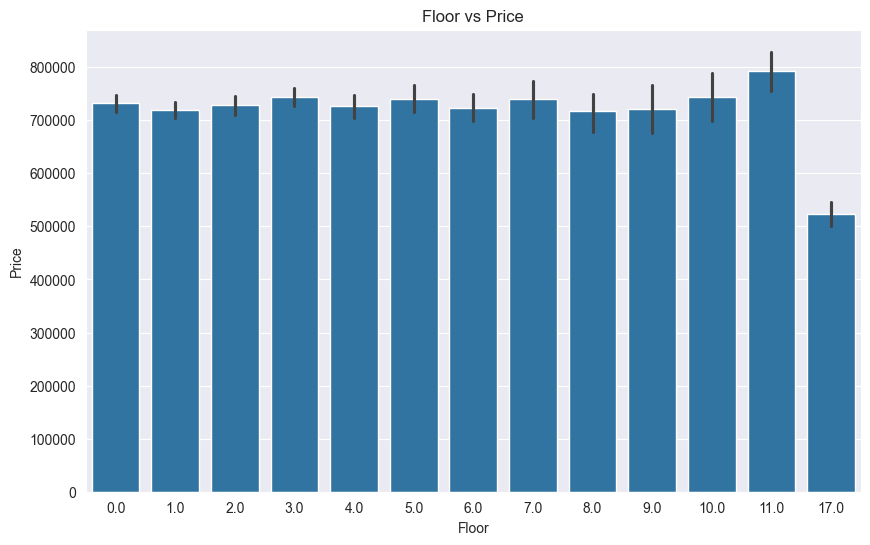

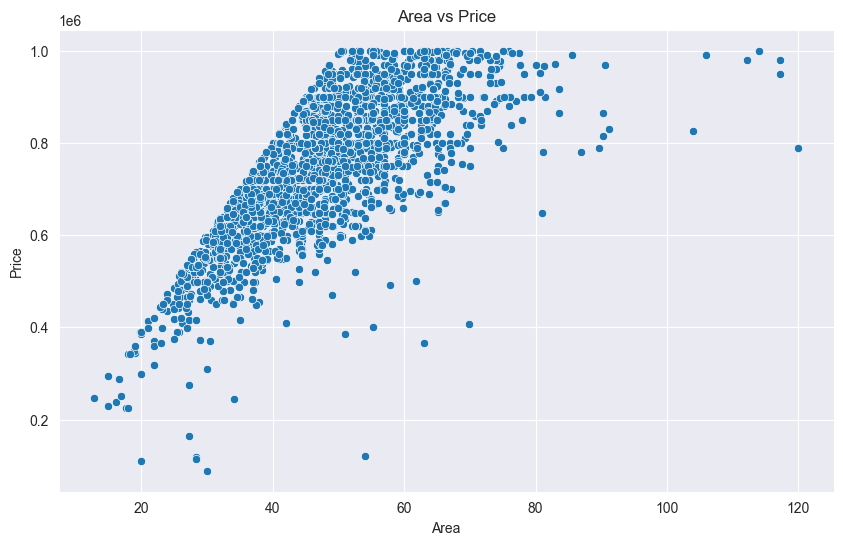

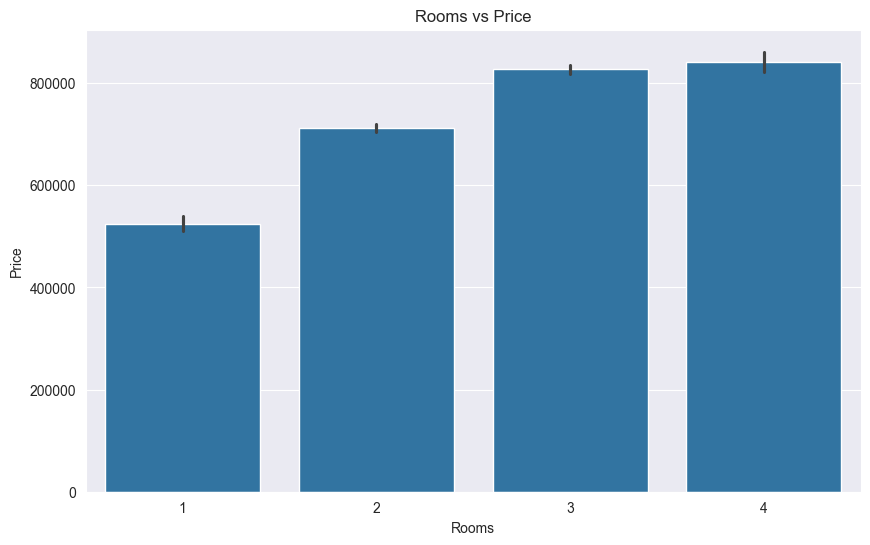

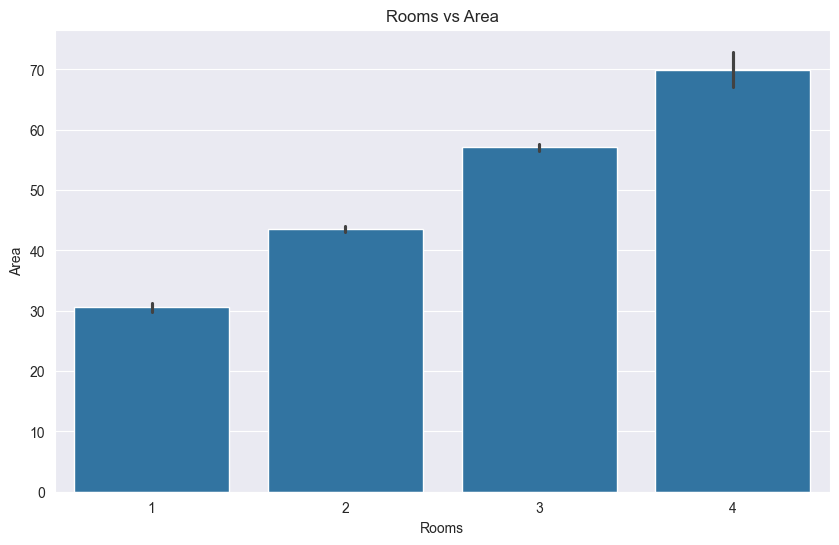

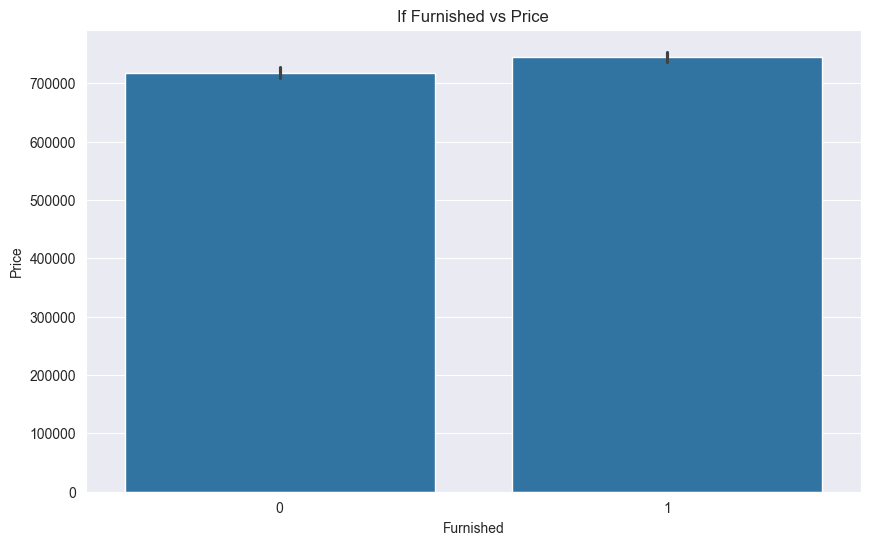

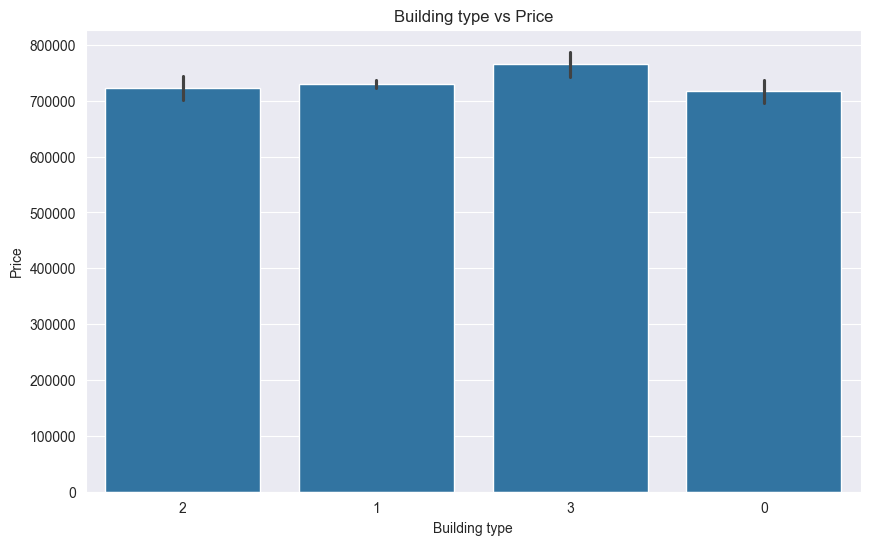

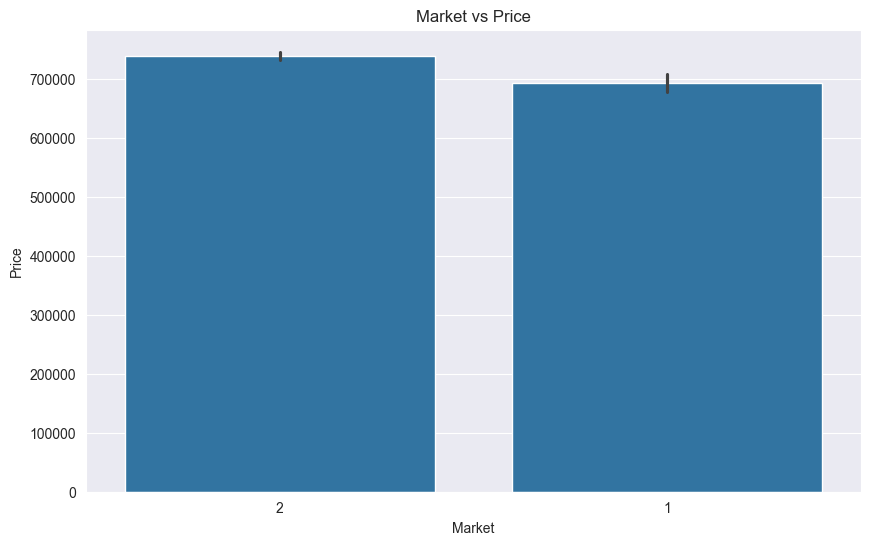

In [5]:
# Plotting
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = processed
# Data conv
df['Floor'] = pd.to_numeric(df['Floor'])
df['Price'] = pd.to_numeric(df['Price'])
df["Area"] = pd.to_numeric(df["Area"])
df["Rooms"] = pd.to_numeric(df["Rooms"])


# Plotting floor and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Floor", y="Price",data=dataset)
plt.title("Floor vs Price")
plt.show()

# Plotting area and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Area", y="Price", data=dataset)
plt.title("Area vs Price")
plt.show()

# Plotting room number and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Rooms", y="Price",data=dataset)
plt.title("Rooms vs Price")
plt.show()

# Plotting room number and area
plt.figure(figsize=(10, 6))
sns.barplot(x="Rooms", y="Area",data=dataset)
plt.title("Rooms vs Area")
plt.show()

# Plotting if_furnished and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Furnished", y="Price",data=dataset)
plt.title("If Furnished vs Price")
plt.show()

# Plotting building type and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Building type", y="Price", data=dataset)
plt.title("Building type vs Price")
plt.show()

# Plotting market and price
plt.figure(figsize=(10, 6))
sns.barplot(x="Market", y="Price", data=dataset)
plt.title("Market vs Price")
plt.show()